![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()
#print(bikes.describe)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
print(bikes.groupby('workingday').total.mean())
print("\n")
print(bikes.groupby('workingday').total.min())
print("\n")
print(bikes.groupby('workingday').total.max())



workingday
0    188.506621
1    193.011873
Name: total, dtype: float64


workingday
0    1
1    1
Name: total, dtype: int64


workingday
0    783
1    977
Name: total, dtype: int64


La variable predictora Workingday es categórica y posee 2 niveles. 1 Si es día laboral y 0 de lo contrario. Para cuando el día no es laboral (Workingday = 0) tenemos que el número de bicicletas promedio que se rentan es 188, mientras que cuando el día es laboral se rentan en promedio 193 bicicletas. 

Adicionalmente, tenemos que el mínimo de bicicletas que se prestan en cualquier día es de 1. Sin embargo, cuando el día es laboral se han prestado hasta 977, por otro lado, cuando el día no es laboral se han prestado hasta 783. 

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64






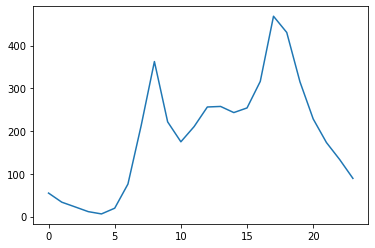

In [6]:
# Celda 1.2
aux = bikes.groupby('hour').total.mean()
print(aux)
print("\n")
print(plt.plot(aux))
print("\n")
#print(aux.min())
#print(aux.max())



Para la variable "horas" tenemos 24 categorías correspondientes a las horas del día. Se puede definir que la hora que menos demanda de bicicletas tiene es 4:00 AM (6,4 bicicletas en promedio se rentan a esta hora). Por otro lado, la hora que más demanda de bicicletas tiene es 5:00 PM (468 bicicletas en promedio).

Si graficamos el dataset podemos ver el comportamiento de las bicicletas rentadas durante el día. El rango horario donde mas se rentan bicicletas es de 6:AM a 9:00 PM



### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

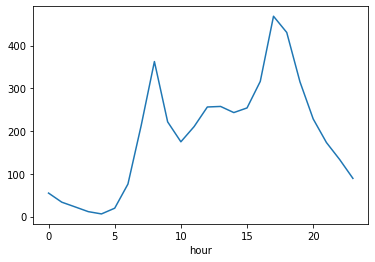

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

AxesSubplot(0.125,0.125;0.775x0.755)


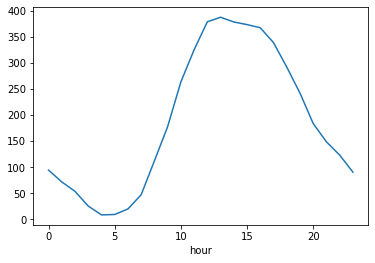

In [8]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
df = bikes.drop(bikes[bikes.workingday == 1].index)
print(df.groupby('hour').total.mean().plot())


Podemos ver que el comportamiento de la renta de bicicletas durante el día cambia dependiendo del tipo de día. La gráfica nos muestra que cuando el día NO es laboral, el comportamiento de la renta tiene una forma senoidal, es decir, el número de bicicletas que se renta oscila.  

La renta de bicicletas alcanza su pico máximo alrededor de las 12:00 PM en este caso (Workingday = 0).

AxesSubplot(0.125,0.125;0.775x0.755)


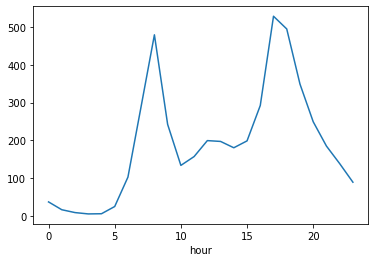

In [9]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 

df = bikes.drop(bikes[bikes.workingday == 0].index)
print(df.groupby('hour').total.mean().plot())



El comportamiento para días laborales es muy parecido al comportamiento base. Esto puede ser producto de que en la base de datos la categoría Workingday=1 predomina a Workingday=0. 

La renta de bicicletas alcanza su pico máximo alrededor de las 5:00 PM en este caso (Workingday = 1]). La hora pico podría explicarse por ser la hora en la que la mayoría de personas que manejan bicicleta salen de sus trabajos. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3
from sklearn.linear_model import LinearRegression

y_train = bikes["total"]

bikes['hour'] = pd.factorize(bikes.hour)[0]
bikes['workingday'] = pd.factorize(bikes.workingday)[0]
X_train = pd.concat([bikes['hour'], bikes['workingday']], axis=1)
print(X_train)
linearR = LinearRegression().fit(X_train, y_train)
print("B0: " + str(linearR.intercept_))
print("Betas: "+ str(linearR.coef_))

                     hour  workingday
datetime                             
2011-01-01 00:00:00     0           0
2011-01-01 01:00:00     1           0
2011-01-01 02:00:00     2           0
2011-01-01 03:00:00     3           0
2011-01-01 04:00:00     4           0
...                   ...         ...
2012-12-19 19:00:00    19           1
2012-12-19 20:00:00    20           1
2012-12-19 21:00:00    21           1
2012-12-19 22:00:00    22           1
2012-12-19 23:00:00    23           1

[10886 rows x 2 columns]
B0: 67.7059502619161
Betas: [10.49206282  4.07248627]


Una de las limitaciones del modelo de regresión lineal es que no es directamente interpretable cuando se tienen una variable con varias categorías.

Para la variable Workingday tenemos un beta de 4, es decir, que para días laborales se tendrá 4 bicicletas rentadas adicionales con respecto a días no laborales. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [69]:
# Celda 4

# Impresión variable a usar (WorkingDay)
print(X_train.columns[1])
print("")

# División de la variable workingday
filter_l = X_train.iloc[:, 1] == 1

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
y_l = y_train.loc[filter_l] # y_l: la observación es en dia laboral.
y_r = y_train.loc[~filter_l] # y_r: la observación NO es en dia laboral.
predict_l = np.average(y_l) # Prediccion de la particion l
predict_r = np.average(y_r) # Predicción de la partición r
MSE_l = np.average( np.square(predict_l - y_l) )
MSE_r = np.average( np.square(predict_r - y_r) )
print("MSE (Workingday = 1) : "+str(MSE_l))
print("MSE (Workingday = 0) : "+str(MSE_r))

print("\n")

# Impresión variable a usar (Hour)
print(X_train.columns[0])
print("")

# División de la variable Hour
filter_2 = X_train.iloc[:, 0] > 5

y_l = y_train.loc[filter_2] # y_l: la observación es despues de las 5 AM.
y_r = y_train.loc[~filter_2] # y_l: la observación es antes de las 5 AM.
predict_l = np.average(y_l)
predict_r = np.average(y_r)
MSE_l = np.average( np.square(predict_l - y_l) )
MSE_r = np.average( np.square(predict_r - y_r) )

print("MSE (Hour > 5) : " + str(MSE_l))
print("MSE (Hour < 5) : " + str(MSE_r))


workingday

MSE (Workingday = 1) : 34040.69710674686
MSE (Workingday = 0) : 30171.346098942427


hour

MSE (Hour > 5) : 31212.16505435094
MSE (Hour < 5) : 945.7802636532437


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9